<center><h1>Logistic Regression with Maximum Likelihood From Scratch</h1></center>

Logistic regression is a very popular algorithm used for classification. The algorithm is mainly designed for binary classification problems but can be easily expanded to multi-class ones.<br> The algorithm is used to predict the probability that sample x<sub>i</sub> belongs to class 1: P(y<sub>i</sub>=1|x<sub>i</sub>;&Theta;). After calculating the probability that sample x<sub>i</sub> belongs to class 1, we need to assign a class to x<sub>i</sub>; this is done using a decision boundary. While there are multiple types of decision boundaries that can be used, a general rule of thumb is: if prob>=0.5: class=1 else: class=0.<br><br>
<b>How do we calculate the probability that sample x<sub>i</sub> belongs to class 1?</b><br>
While in linear regression we use &Theta;<sup>T</sup>X to predict our continous variable (-inf to +inf), we need to transform our predictions to the probability that sample x<sub>i</sub> belongs to class 1; this is done using the sigmoid function (a.k.a logistic function). The equation for the sigmoid function is: h(x)= 1/1+e<sup>-&Theta;<sup>T</sup>x</sup><br>
<img src='https://upload.wikimedia.org/wikipedia/commons/8/88/Logistic-curve.svg' alt="Sigmoid Function (a.k.a Logistic Function)"/>
<br><br>
<b>Now that we know how to predict the probability that x<sub>i</sub> belongs to class 1, how do we solve for &Theta;? In other words, how do we find the optimal values for our parameters &Theta;?</b><br>
We need to maximize the <b>likelihood function</b>. The likelihood of our model parameterized by &Theta given our observations.<br>
So after selecting our parameters &Theta;, we can assess the fit of our model (sigmoid function) parametrized by &Theta by calculating the likelihood.<br>
The likelihood is calculated by multiplying the predicted probability (p) for observations that belong to class 1 by 1 - the predicted probability (1-p) for observations that belong to class 0. In other words, the likelihood function rewards our model for predicting a high probability for observations that belong to class 1 and for predicting a low probability for observations that belong to class 0.<br>
Imagine the following, we have 2 fitted models that we need to compare. We will calculate the likelihood for the 2 fitted models and the one that maximizes the likelihood function, is the better fit.<br>

<table style="margin-left: 50px; text-align: center;" >
<tr>
    <th>Model 1</th>
</tr>
<tr>
    <th style="text-align: center; border: 1px solid black;">P</th>
    <th style="text-align: center; border: 1px solid black;">1-P</th>
    <th style="text-align: center; border: 1px solid black;">Real Class</th>
</tr>
<tr>
    <td style="text-align: center; border: 1px solid black;">0.6</td>
    <td style="text-align: center; border: 1px solid black;">-</td>
    <td style="text-align: center; border: 1px solid black;">1</td>
</tr>
<tr>
    <td style="text-align: center; border: 1px solid black;">0.7</td>
    <td style="text-align: center; border: 1px solid black;">-</td>
    <td style="text-align: center; border: 1px solid black;">1</td>
</tr>
<tr>
    <td style="text-align: center; border: 1px solid black;">-</td>
    <td style="text-align: center; border: 1px solid black;">0.5</td>
    <td style="text-align: center; border: 1px solid black;">0</td>
</tr>
<tr>
    <td style="text-align: center; border: 1px solid black;">-</td>
    <td style="text-align: center; border: 1px solid black;">0.6</td>
    <td style="text-align: center; border: 1px solid black;">0</td>
</tr>
</table> 

<table style="margin-left: 50px; text-align: center;" >
<tr>
    <th>Model 2</th>
</tr>
<tr>
    <th style="text-align: center; border: 1px solid black;">P</th>
    <th style="text-align: center; border: 1px solid black;">1-P</th>
    <th style="text-align: center; border: 1px solid black;">Real Class</th>
</tr>
<tr>
    <td style="text-align: center; border: 1px solid black;">0.8</td>
    <td style="text-align: center; border: 1px solid black;">-</td>
    <td style="text-align: center; border: 1px solid black;">1</td>
</tr>
<tr>
    <td style="text-align: center; border: 1px solid black;">0.75</td>
    <td style="text-align: center; border: 1px solid black;">-</td>
    <td style="text-align: center; border: 1px solid black;">1</td>
</tr>
<tr>
    <td style="text-align: center; border: 1px solid black;">-</td>
    <td style="text-align: center; border: 1px solid black;">0.89</td>
    <td style="text-align: center; border: 1px solid black;">0</td>
</tr>
<tr>
    <td style="text-align: center; border: 1px solid black;">-</td>
    <td style="text-align: center; border: 1px solid black;">0.8</td>
    <td style="text-align: center; border: 1px solid black;">0</td>
</tr>
</table>
<br clear="all"/>

Likelihood for Model 1: p * p * (1-P) * (1-p): 0.6 * 0.7 * 0.5 * 0.6: 0.126<br>
Likelihood for Model 2: p * p * (1-P) * (1-p): 0.8 * 0.75 * 0.89 * 0.8: 0.4272<br>

The likelihood for Model 2 is higher than Model 1 therefore, Model 2 is a better fit to our data.<br><br>

Now that we know how to assess the fit of our model, we need to solve for the parameters &Theta;. In other words, we need to maximize the likelihood function. And what do we use in order to maximize or minimize a certain function? <b>Differentiation</b><br>

Taking the derivative of the likelihood function as the product of the probabilities is hard and not computationally efficient therefore, we will use the <b>log</b> of the likelihood function. An explaination of why taking the derivative of the log likelihood function is possible, more efficient and will result in the same value of theta: <a href='https://stats.stackexchange.com/q/174481'>https://stats.stackexchange.com/q/174481</a> & <a href='https://www.youtube.com/watch?v=ddqny3aZNPY'>https://www.youtube.com/watch?v=ddqny3aZNPY</a> <br>

For example, to calculate the log likelihood for Model 1, log(likelihood): log(p * p * (1-P) * (1-p)) and since log(ab) = log(a) + log(b), now, to calculate the log likelihood for Model 1, log(likelihood): log(p) + log(p) + log(1-P) + log(1-p)<br>
Since the log of any value between 0 and 1 is negative, we will add a negative sign to the log(likelihood) function: -log(likelihood)<br>
After adding a negative sign infront of the log(likelihood) function, this function (-log(likelihood)) is now called the <b>cross-entropy</b>. So, minimizing the cross-entropy is the same as maximizing the likelihood.<br><br>

Finally, the cross-entropy function for a binary classifier that we need to minimize is:<br>
<img src="https://miro.medium.com/max/1096/1*rdBw0E-My8Gu3f_BOB6GMA.png" alt="Cross-entropy function for binary classification" height="300px" width="500px"/>

N = Number of samples<br>
y<sub>i</sub> = Real value (0 or 1)<br>
p(y<sub>i</sub>) = predicted probability<br>

If an observation has a real value or class of 1, the log(p(y<sub>i</sub>)) is calculated and if the real value is 0, the log(1-p(y<sub>i</sub>)) is calculated.
<br><br>

So now that we want to minimize our cross-entropy model, we will use gradient descent for such task. In order to make use of the gradient descent optimization algorithm, we need to find the derivative of the cross-entropy with respect to weights. The final equation is:<br>
<img src="https://predictiveprogrammer.com/wp-content/uploads/2018/11/dj_by_dw.jpg" alt="Derivative of cross-entropy" height="200px" width="300px"/>

m = Number of samples<br>
y = Real value (0 or 1)<br>
y<sub>hat</sub> = predicted probability<br>

<hr>

Now, we will implement a simple logistic regression algorithm with only one feature

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
X, y = make_blobs(n_samples=100, centers=2, n_features=1, cluster_std=1.6)

In [3]:
X=X[:, 0]

In [4]:
temp_dim=np.zeros(len(X))

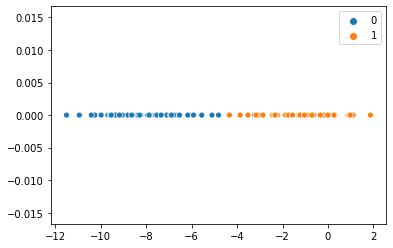

In [5]:
sns.scatterplot(x=X, y=temp_dim, hue=y)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [7]:
max_n_iters = 1000
learning_rate = 0.01
weight = 0
bias = 0

In [8]:
def get_sigmoid(weighted_x):
    return 1.0/(1.0 + np.exp(-weighted_x))

In [9]:
def get_linear_th_trans_x(x_values):
    return x_values * weight + bias

In [10]:
def get_probs(x_values):
    weighted_x = get_linear_th_trans_x(x_values)
    probs = get_sigmoid(weighted_x)
    return probs

In [11]:
def get_cross_entropy(probs, y_values):
    cross_entropy = -np.mean(y_values * np.log(probs + 1e-10) + (1 - y_values) * np.log((1 - probs) + 1e-10))
    return cross_entropy

In [12]:
def get_accuracy(probs, y_values):
    predicted_classes=probs>=0.5
    return np.mean(predicted_classes==y_values)

In [13]:
for i in range(max_n_iters):
    probs = get_probs(X_train)
    print(get_cross_entropy(probs, y_train))
    
    diff = probs - y_train
    
    slope_w = np.mean(diff * X_train, axis=0, keepdims=True).T
    slope_b = np.mean(diff)
    
    step_size_weight=learning_rate * slope_w
    step_size_bias=learning_rate * slope_b
    
    weight = weight - step_size_weight
    bias = bias - step_size_bias

0.6931471803599453
0.6666682029447365
0.6445324964522545
0.6259779191795467
0.6103638628920456
0.5971615594274576
0.5859393945053475
0.5763471889809775
0.5681015250313903
0.5609729894337804
0.5547755306129029
0.5493577954095981
0.5445961799319671
0.5403893011664506
0.5366536164539137
0.533319956416212
0.5303307785581189
0.527637986988263
0.525201196192931
0.5229863432851678
0.5209645742259978
0.5191113460397221
0.5174056998945139
0.5158296698662644
0.5143677998897738
0.5130067473410952
0.5117349562911008
0.510542387035063
0.5094202912757104
0.5083610245010255
0.507357888792845
0.5064050006348504
0.5054971793403873
0.5046298525541916
0.503798975945451
0.5030009647396261
0.5022326351615862
0.5014911542049676
0.5007739964194367
0.5000789066321376
0.499403867702538
0.49874707255943207
0.4981068998915362
0.4974818929640977
0.49687074111734475
0.4962722635717185
0.49568539522228006
0.4951091741525821
0.49454273063836496
0.4939852774450296
0.4934361012511044
0.4928945550537577
0.4923600514325

0.3532393583924075
0.3529939669681049
0.3527489326608405
0.35250425480514364
0.35225993273685263
0.35201596579311367
0.3517723533123777
0.35152909463439963
0.3512861891002356
0.3510436360522413
0.3508014348340702
0.35055958479067123
0.35031808526828706
0.35007693561445213
0.34983613517799056
0.3495956833090144
0.34935557935892136
0.34911582268039315
0.3488764126273934
0.3486373485551653
0.34839862982023045
0.3481602557803861
0.3479222257947037
0.3476845392235264
0.3474471954284676
0.3472101937724086
0.34697353361949673
0.34673721433514354
0.3465012352860223
0.34626559584006644
0.3460302953664677
0.34579533323567346
0.3455607088193856
0.34532642149055764
0.3450924706233933
0.3448588555933445
0.34462557577710895
0.3443926305526285
0.3441600192990869
0.3439277413969082
0.3436957962277541
0.34346418317452243
0.343232901621345
0.34300195095358565
0.342771330557838
0.34254103982192347
0.34231107813488965
0.3420814448870079
0.3418521394697714
0.3416231612758931
0.34139450969930385
0.341166184

0.2649476318057573
0.2648189708885885
0.26469045941663316
0.2645620971463175
0.2644338838345524
0.26430581923873203
0.2641779031167327
0.26405013522691206
0.26392251532810773
0.26379504317963653
0.2636677185412932
0.26354054117334946
0.26341351083655284
0.26328662729212593
0.26315989030176495
0.26303329962763894
0.26290685503238864
0.26278055627912533
0.2626544031314302
0.26252839535335276
0.2624025327094103
0.2622768149645863
0.2621512418843302
0.2620258132345555
0.26190052878163944
0.2617753882924213
0.26165039153420233
0.2615255382747437
0.26140082828226596
0.2612762613254481
0.2611518371734267
0.26102755559579427
0.26090341636259873
0.26077941924434256
0.26065556401198126
0.26053185043692273
0.2604082782910263
0.2602848473466015
0.26016155737640717
0.2600384081536505
0.25991539945198605
0.2597925310455147
0.25966980270878276
0.25954721421678084
0.259424765344943
0.25930245586914574
0.25918028556570694
0.259058254211385


In [14]:
print("Accuracy of the lr model: ", get_accuracy(get_probs(X_test), y_test)*100)

Accuracy of the lr model:  95.0
